In [ ]:
pip install scipy --upgrade

In [12]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [13]:
file_path = "C:/dataset.arff"

In [15]:
!pip install liac-arff
import arff
with open(file_path, 'r') as f:
    dataset = arff.load(f)

In [17]:
import pandas as pd

def custom_arff_parser(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_section = False
    attributes = []
    data = []
    
    for line in lines:
        line = line.strip()
        if line.startswith('@ATTRIBUTE'):
            parts = line.split(' ', 2)
            attr_name = parts[1].replace('"', '').replace(' ', '_')
            attr_type = parts[2]
            attributes.append((attr_name, attr_type))
        elif line.lower() == '@data':
            data_section = True
        elif data_section:
            if not line or line.startswith('%'):
                continue
            data.append(line.split(','))

    # Create a DataFrame
    attr_names = [attr[0] for attr in attributes]
    df = pd.DataFrame(data, columns=attr_names)
    
    return df

# Use the custom ARFF parser
file_path = r'C:/dataset.arff'
df = custom_arff_parser(file_path)

# Display the DataFrame
df.head()

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [18]:
df.tail()

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [19]:
print(df['Product'].nunique())

10000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UDI         10000 non-null  object
 1   Product     10000 non-null  object
 2   Type        10000 non-null  object
 3   Air         10000 non-null  object
 4   Process     10000 non-null  object
 5   Rotational  10000 non-null  object
 6   Torque      10000 non-null  object
 7   Tool        10000 non-null  object
 8   Machine     10000 non-null  object
 9   TWF         10000 non-null  object
 10  HDF         10000 non-null  object
 11  PWF         10000 non-null  object
 12  OSF         10000 non-null  object
 13  RNF         10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [21]:
#Convert column to Float. 
df['Air'] = df['Air'].astype(float)

In [22]:
df['Air'].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air, dtype: float64

In [23]:
# Repeat the same for other columns with numerical data
df['Process'] = df['Process'].astype(float)
df['Process'].describe()

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process, dtype: float64

In [24]:
# Repeat the same for other columns with numerical data
df['Rotational'] = df['Rotational'].astype(float)
df['Rotational'].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational, dtype: float64

In [25]:
# Repeat the same for other columns with numerical data
df['Torque'] = df['Torque'].astype(float)
df['Torque'].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque, dtype: float64

In [26]:
df['Tool'] = df['Tool'].astype(float)
df['Tool'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Tool
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [27]:
 print(df['Air'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Air
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None


In [28]:
# Check what items are located in "Machine"
print(df['Machine'].unique())

['0' '1']


In [29]:
print(df['Machine'].value_counts())

Machine
0    9661
1     339
Name: count, dtype: int64


In [30]:
# Convert to Float
df['Machine'] = df['Machine'].astype(float)
df['Machine'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Machine
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [31]:
print(df['Machine'].unique())

[0. 1.]


In [32]:
print(df['Machine'].value_counts())

Machine
0.0    9661
1.0     339
Name: count, dtype: int64


In [33]:
# Do the same for the rest columns
print(df['TWF'].unique())

['0' '1']


In [34]:
print(df['TWF'].value_counts())

TWF
0    9954
1      46
Name: count, dtype: int64


In [35]:
df['TWF'] = df['TWF'].astype(float)
df['TWF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: TWF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [36]:
print(df['HDF'].unique())
print(df['HDF'].value_counts())

['0' '1']
HDF
0    9885
1     115
Name: count, dtype: int64


In [37]:
df['HDF'] = df['HDF'].astype(float)
df['HDF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: HDF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [38]:
print(df['PWF'].unique())
print(df['PWF'].value_counts())

['0' '1']
PWF
0    9905
1      95
Name: count, dtype: int64


In [39]:
df['PWF'] = df['PWF'].astype(float)
df['PWF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: PWF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [40]:
print(df['OSF'].unique())
print(df['OSF'].value_counts())

['0' '1']
OSF
0    9902
1      98
Name: count, dtype: int64


In [41]:
df['OSF'] = df['OSF'].astype(float)
df['OSF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: OSF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [42]:
print(df['RNF'].unique())
print(df['RNF'].value_counts())

['0' '1']
RNF
0    9981
1      19
Name: count, dtype: int64


In [43]:
df['RNF'] = df['RNF'].astype(float)
df['RNF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: RNF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [44]:
print(df['UDI'].nunique())

10000


In [45]:
print(df['UDI'].unique())
print(df['UDI'].value_counts())

['1' '2' '3' ... '9998' '9999' '10000']
UDI
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64


In [46]:
df['UDI'] = df['UDI'].astype(float)
df['UDI'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: UDI
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [47]:
print(df['Product'].unique())
print(df['Product'].value_counts())

['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
Product
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64


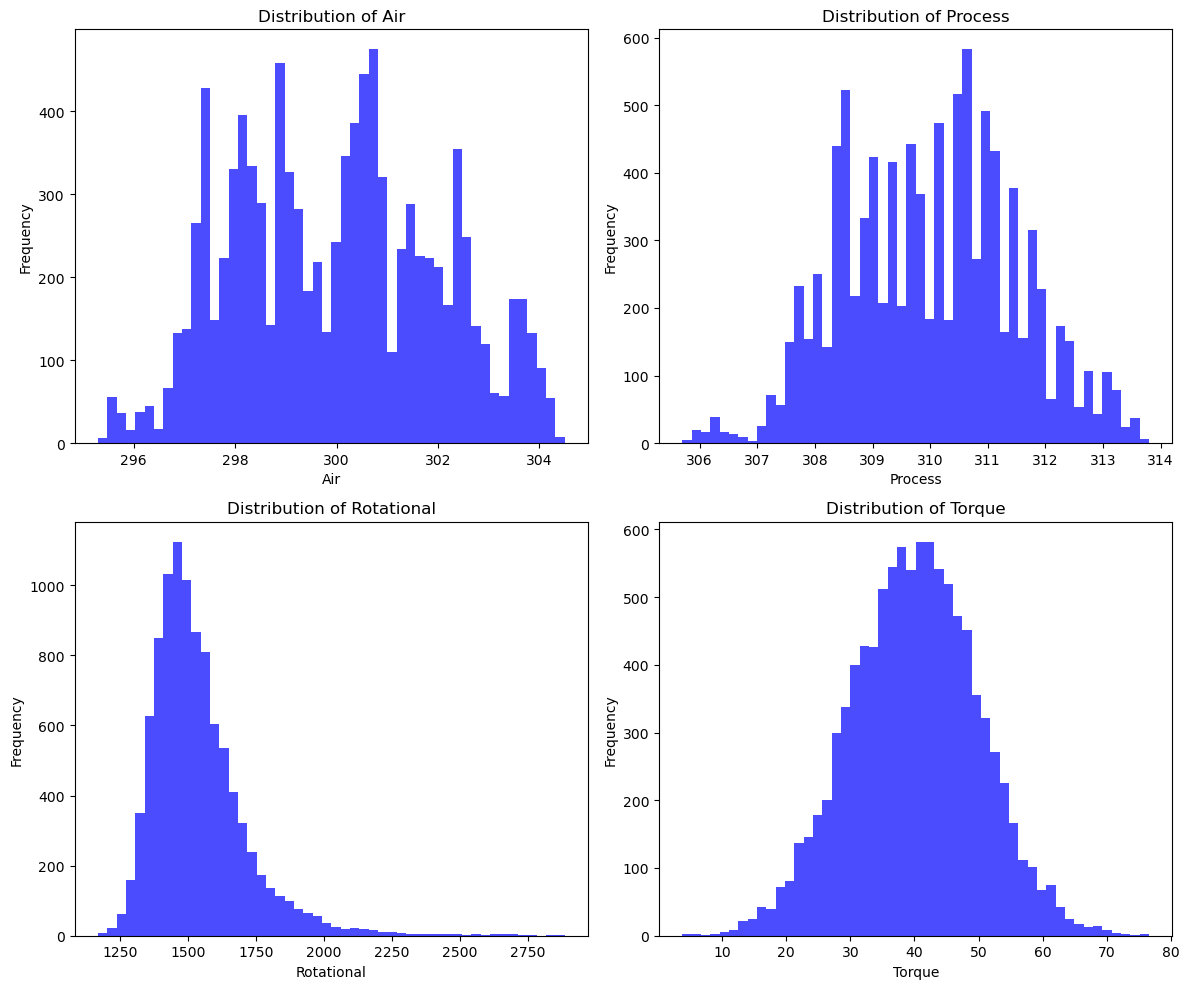

In [48]:
# Plotting distributions for each specified column
columns_to_plot = ['Air', 'Process', 'Rotational', 'Torque']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.hist(df[column], bins=50, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

We can see the spike in Rotational distribution at 1500 rpm with a few outliers around 2750 rpm.
Average tourque among all pieces of equipment is between 35-45

In [49]:
# Exclude the 'Product' and 'Type' columns as correlation is possible for numerical data only
df_numeric = df.drop(columns=['Product', 'Type'])

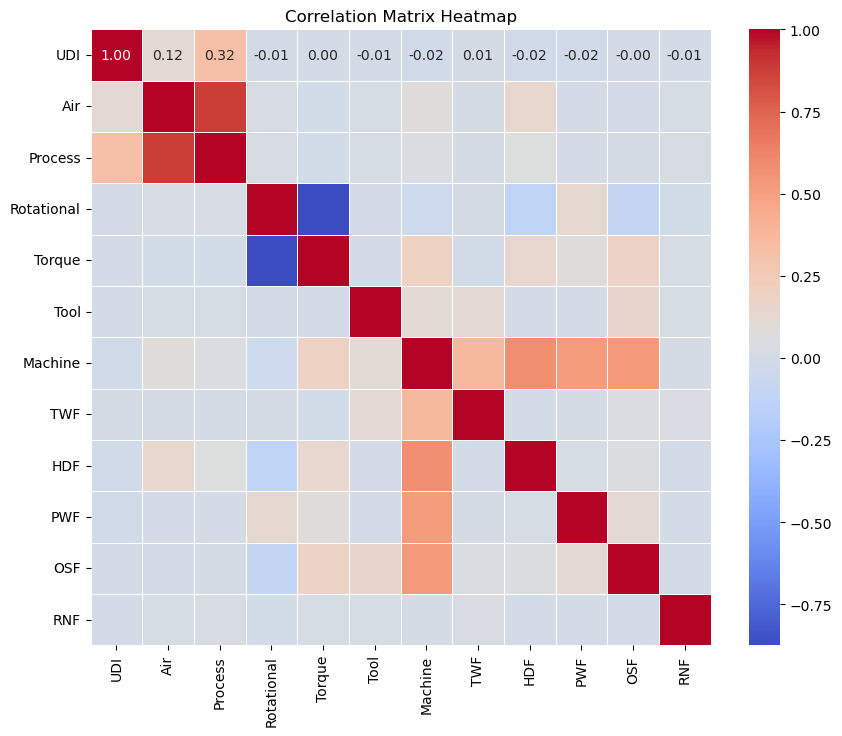

In [50]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

We can see strong positive correlation between Process&Air; and strong negative correlation between Rotational&Torque